### Работа с переменными

#### Тренировка на начальных данных

In [114]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Конвертируем датасет в датафрейм

In [116]:
california_housing = fetch_california_housing()
df = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']], columns=california_housing.feature_names + ['MedHouseVal'])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


В датасете нет пустых значений

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [119]:
statistic = [['model', 'RMSE_Test', 'RMSE_Train', 'R2_Test', 'R2_Train']]

def train(df, model_name):
  X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[:-1]],
                                                    df[df.columns[-1]], test_size=0.2, random_state=2)
  model = LinearRegression()
  model.fit(X_train, Y_train)    

  RMSE_Test = mean_squared_error(Y_test, model.predict(X_test), squared=False)
  RMSE_Train = mean_squared_error(Y_train, model.predict(X_train), squared=False)
  R2_Test = r2_score(Y_test, model.predict(X_test))
  R2_Train = r2_score(Y_train, model.predict(X_train))

  print("Test RMSE: ", RMSE_Test)
  print("Train RMSE: ", RMSE_Train)
  print("Test R2: ", R2_Test)
  print("Train R2: ", R2_Train)
  print("Test Score: ", model.score(X_test, Y_test))
  print("Train Score: ", model.score(X_train, Y_train))
  statistic.append([model_name, RMSE_Test, RMSE_Train, R2_Test, R2_Train])

In [120]:
train(df, model_name='Необработаная модель')

Test RMSE:  0.7327644142619786
Train RMSE:  0.7224911853503633
Test R2:  0.6013853272055152
Train R2:  0.6068205998456939
Test Score:  0.6013853272055152
Train Score:  0.6068205998456939


#### Анализ целевой переменной и поиск корреляций

Посмотрим на распределение целевой переменной. Распределение похоже на нормальное.

array([[<AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

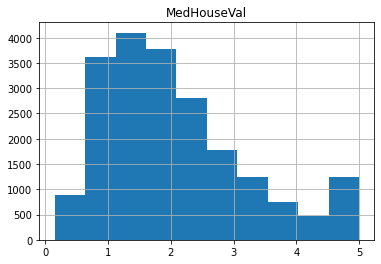

In [121]:
df[['MedHouseVal']].hist()

Попробуем логарифмировать распределение и посмотреть как изменится график. Распределение также получилось нормальным со сдвигом, поэтому логарифмирование можно не проводить.

array([[<AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

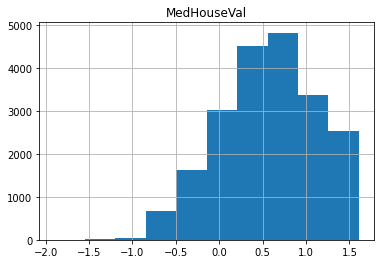

In [122]:
np.log(df[['MedHouseVal']]).hist()

In [123]:
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Коэффициент корреляции нам показывает степень зависимости переменных между собой. И очень плохо если не целевые признаки между собой сильно зависят, такое поведение нам дает понять, что один из признаков мы можем удалить. 

AveRooms и AveBedrms сильно коррелируют (0.85), что в принципе логично, чем больше жилых комнат в доме тем больше в ней ванных комнат. Признак AveRooms имеет большую корреляцию с целевой переменной, чем AveBedrms, поэтому оставим признак AveRooms.

Longitude и Latitude имеют еще больший коэффициент корреляции (-0.92 - обратнозависимы). Это наверное связано с тем что на пересечении долгты и широты не могут находиться разные дома, и по этому для одного значения Longitude всегда разные значения Latitude и отсюда появляется обратная зависимость. (Верно?)

MedInc хорошо коррелирует с целевой переменной, что хорошо для нас.

<AxesSubplot:>

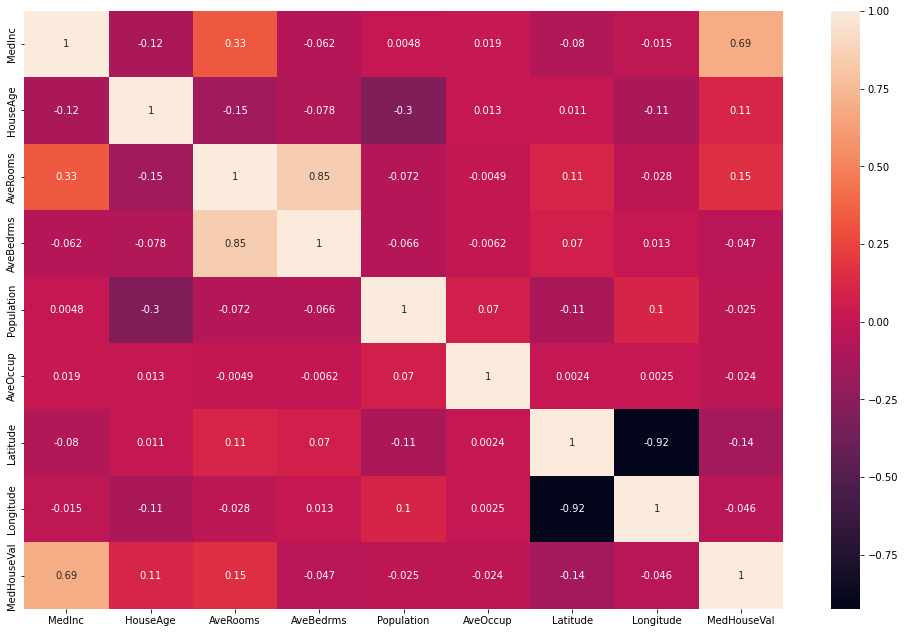

In [124]:
plt.subplots(figsize=(17,11))  
sns.heatmap(corr, annot=True, fmt='.2g')

Сначала уберем только AveBedrms

In [125]:
df_without_corr_params = df.drop(columns='AveBedrms', axis=1, inplace=False)
df_without_corr_params

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


После удаления AveBedrms наша метрика немного ухудшилась

In [126]:
train(df_without_corr_params, model_name='После удаления AveBedrms')

Test RMSE:  0.7424169282323411
Train RMSE:  0.7311812390140298
Test R2:  0.5908144655241186
Train R2:  0.5973054712870445
Test Score:  0.5908144655241186
Train Score:  0.5973054712870445


Если уберем AveRooms, а AveBedrms оставим то наша метрика дает чуть более лучшие результаты чем предыдущая, но всё равно хуже чем первоночальная. (Не понятно почему, ведь AveRooms коррелирует с целевым признаком больше, нет?). 

Вероятно из-за того что AveRooms коррелирует с другими не целевыми значениями больше чем AveBedrms (AveRooms коррелирует с MedInc (0.33)). Верно?

In [127]:
df_without_corr_params = df.drop(columns='AveRooms', axis=1, inplace=False)
train(df_without_corr_params, model_name='После удаления AveRooms')

Test RMSE:  0.735726183582479
Train RMSE:  0.7285792621734266
Test R2:  0.5981564841128051
Train R2:  0.6001664240339422
Test Score:  0.5981564841128051
Train Score:  0.6001664240339422


In [128]:
df_without_corr_params_and_longitude = df_without_corr_params.drop(columns='Longitude', axis=1, inplace=False)
df_without_corr_params_and_longitude

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,39.43,0.847


Метрики изменились вхудшую сторону, получается Longitude и Latitude нужно оставить. Значит отрицательная корреляция между не целевыми признаками это хорошо?

In [129]:
train(df_without_corr_params_and_longitude, model_name='После удаления Longitude')

Test RMSE:  0.8127549968106587
Train RMSE:  0.7966154511829852
Test R2:  0.5096074805155244
Train R2:  0.5220052777139748
Test Score:  0.5096074805155244
Train Score:  0.5220052777139748


In [130]:
train(df_without_corr_params.drop(columns='Latitude', axis=1, inplace=False), model_name='После удаления Latitude')

Test RMSE:  0.81777834980987
Train RMSE:  0.8030180856676427
Test R2:  0.5035268596799705
Train R2:  0.514290829641946
Test Score:  0.5035268596799705
Train Score:  0.514290829641946


#### Удаление выбросов

Посмотрим на выбросы по признакам. Обратим внимание на Population. Сразу заметно что там много выбросов, поэтому сейчас мы очистим выбросы.

<AxesSubplot:>

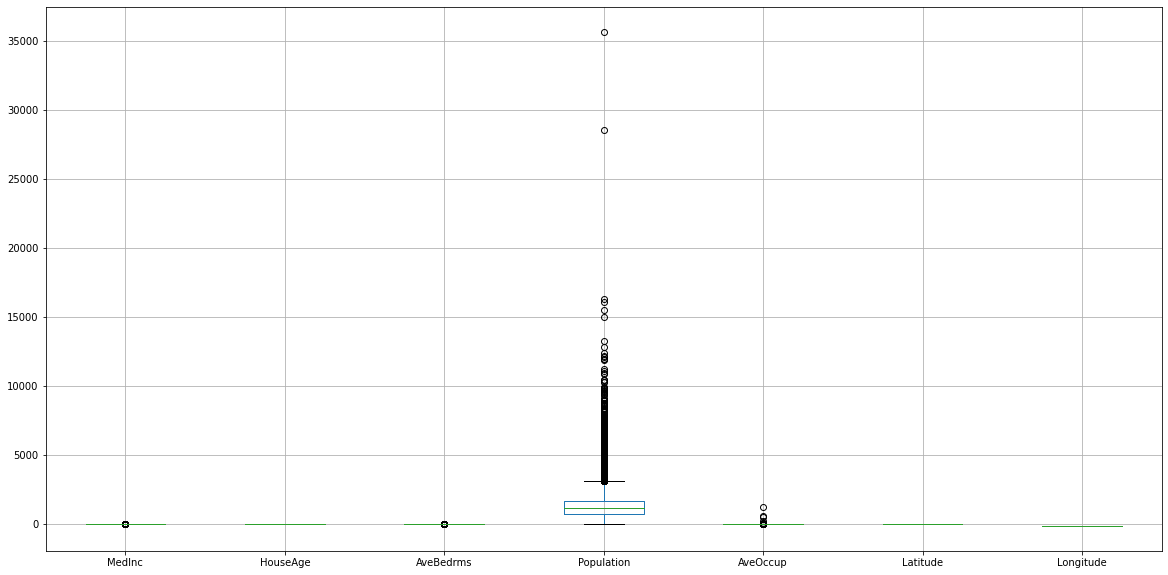

In [131]:
df_without_corr_params.loc[:,df_without_corr_params.columns[:-1]].boxplot(figsize=(20, 10))

Пишем функцию очистки выбросов на основе IQR

In [132]:
def clean_emissions(df, cols):
  df = df.copy()

  for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df.query('(@Q1 - 1.5 * @IQR) <= {} <= (@Q3 + 1.5 * @IQR)'.format(col))
    print(col, ": ", IQR)

  return df

По графику видно что мы смогли избавиться от выбросов в признаке Population. Повторим эту процедуру на всех признаках.

Population :  938.0


<AxesSubplot:>

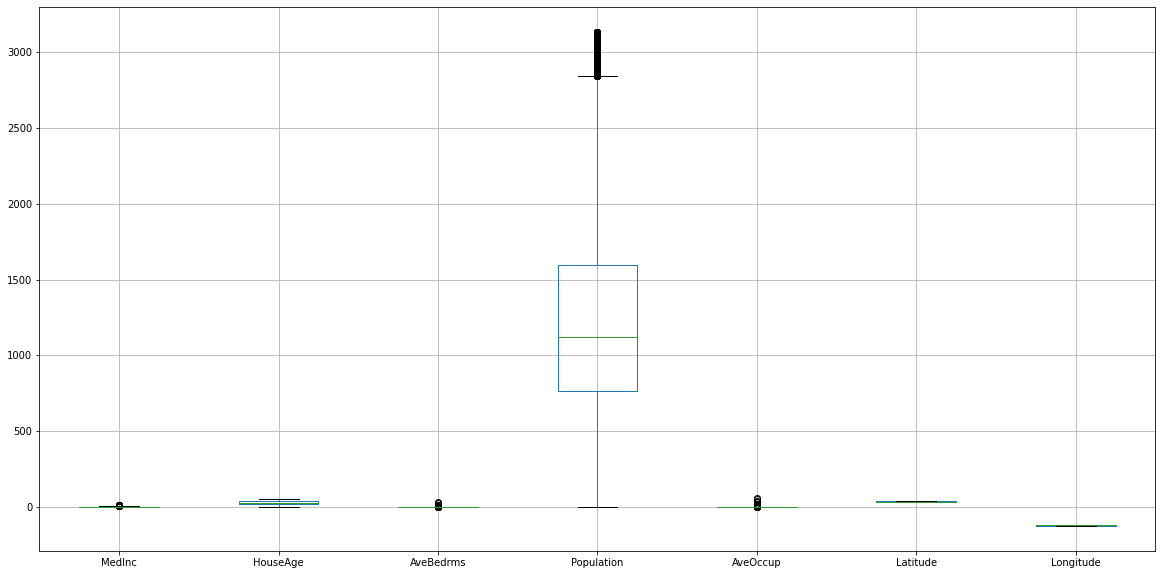

In [133]:
clean_emissions(df_without_corr_params, ['Population']).loc[:,df_without_corr_params.columns[:-1]].boxplot(figsize=(20, 10))

По итогу получаем датафрейм очищенный от выбросов

MedInc :  2.17985
HouseAge :  19.0
AveBedrms :  0.09352819774818144
Population :  940.0
AveOccup :  0.8582393339358907
Latitude :  3.789999999999999
Longitude :  3.789999999999992


<AxesSubplot:>

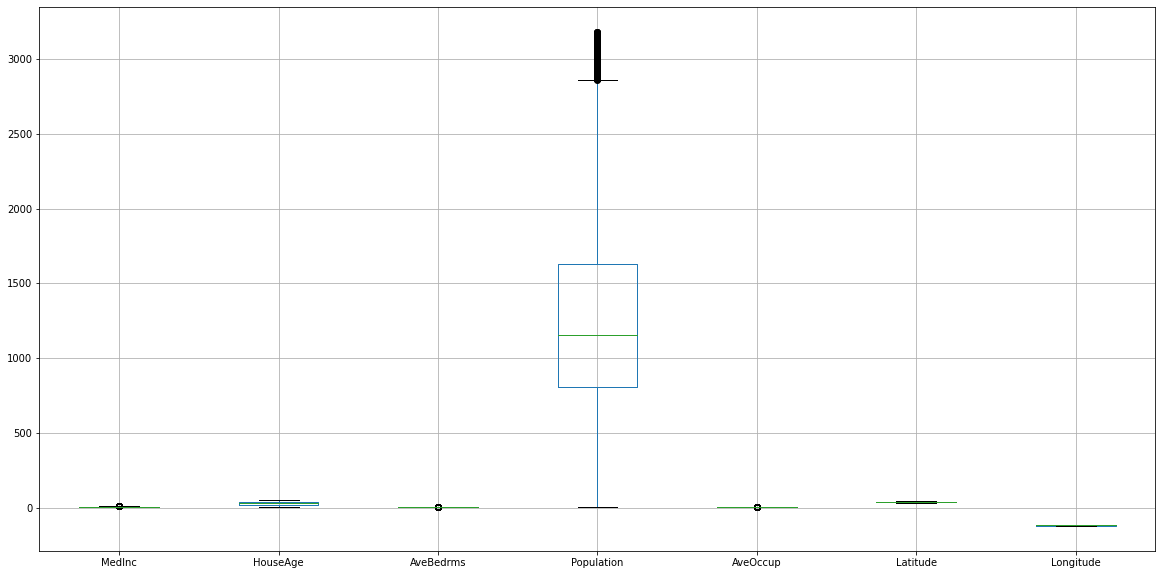

In [134]:
cleaned_df = clean_emissions(df_without_corr_params, list(df_without_corr_params.columns)[:-1])
cleaned_df.loc[:,df_without_corr_params.columns[:-1]].boxplot(figsize=(20, 10))

In [135]:
cleaned_df

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,39.43,-121.32,0.847


Тренируем модель после удаления выбросов

In [136]:
train(cleaned_df, model_name='После удаления выбросов')

Test RMSE:  0.6461339904164625
Train RMSE:  0.6532375657773575
Test R2:  0.6388073600378661
Train R2:  0.6296465379919101
Test Score:  0.6388073600378661
Train Score:  0.6296465379919101


##### Проведем математические преобразования

Построим гистограммы по двум датафреймам, до удаления выбросов и после удаления. Видим что после удаления выбросов признаки AveBedrms, Population, AveOccup приняли нормальное распределение, что хорошо.

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveBedrms'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>, <AxesSubplot:>]],
      dtype=object)

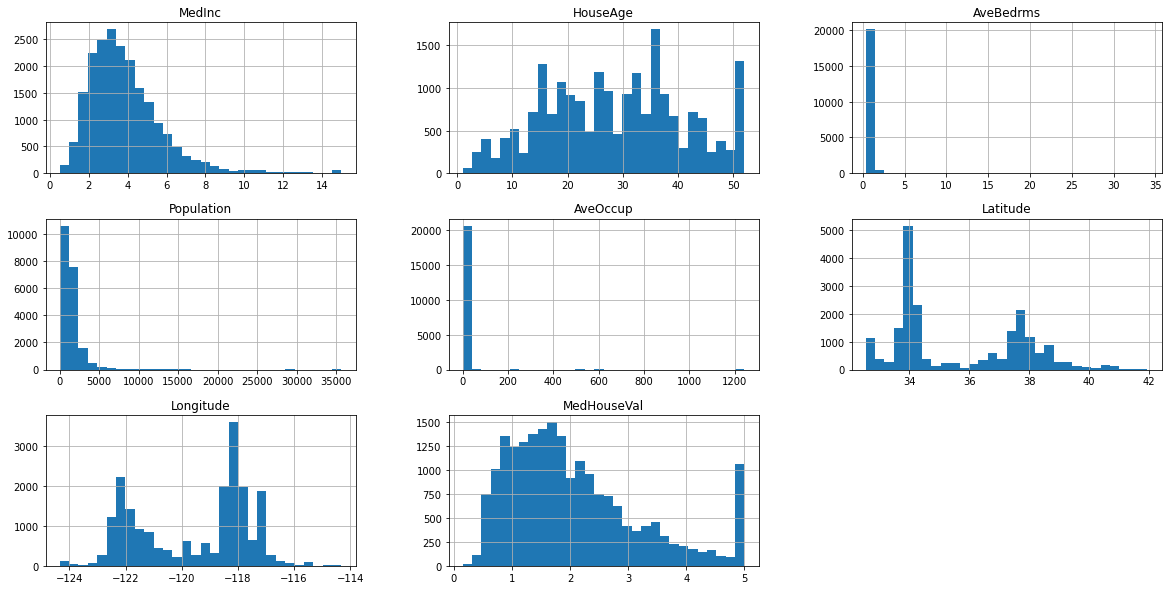

In [137]:
df_without_corr_params.hist(figsize=(20, 10), bins=30)

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveBedrms'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>, <AxesSubplot:>]],
      dtype=object)

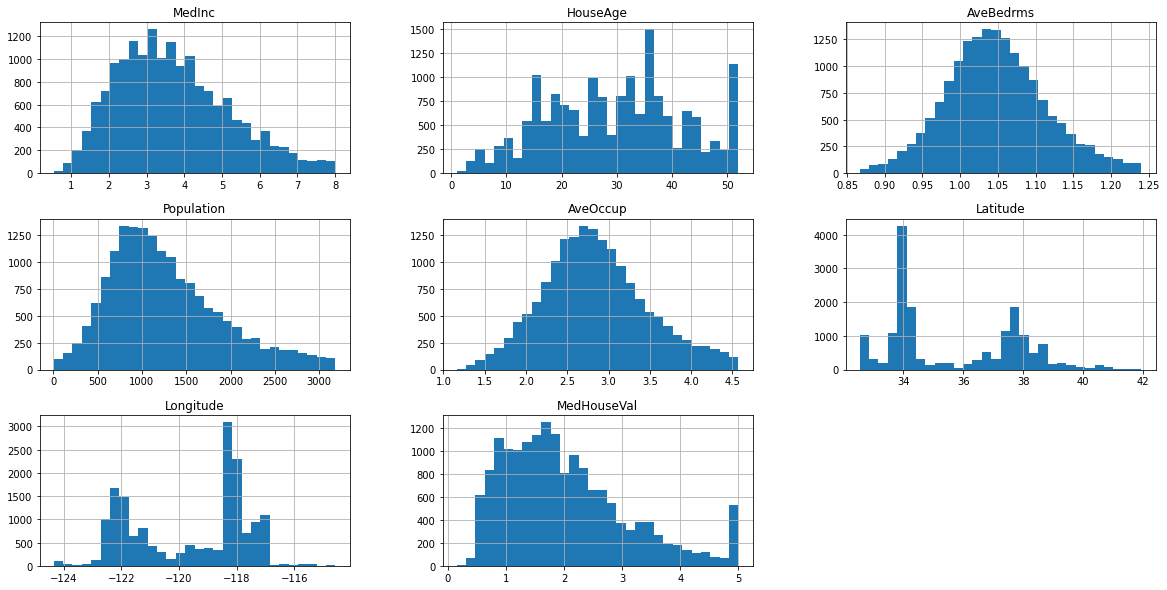

In [138]:
cleaned_df.hist(figsize=(20, 10), bins=30)

Посмотрим на преобразования над целевым признаком. По графикам видно что извлечение корня положительно сказывается на распределении.

array([[<AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

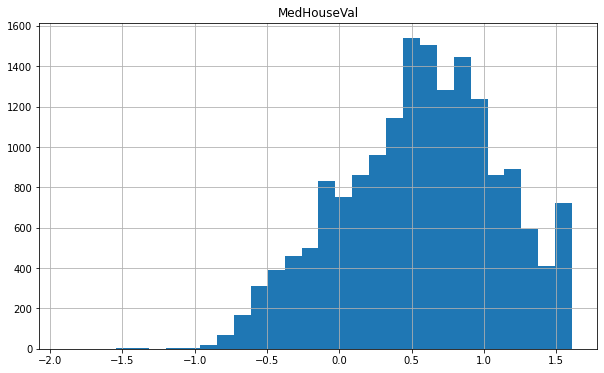

In [139]:
np.log(cleaned_df[['MedHouseVal']]).hist(figsize=(10, 6), bins=30)

array([[<AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

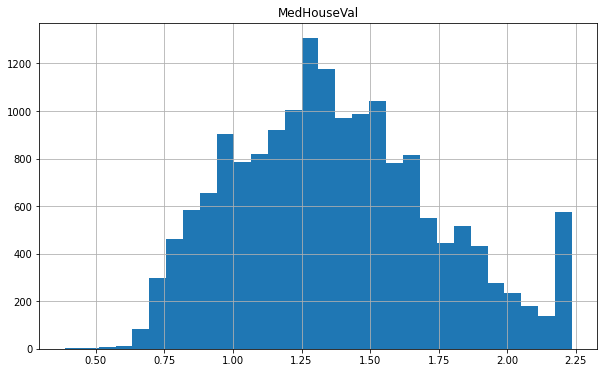

In [140]:
(cleaned_df[['MedHouseVal']] ** 0.5).hist(figsize=(10, 6), bins=30)

Посмотрим на преобразования над MedInc. По графикам видно что извлечение корня положительно сказывается на распределении.

array([[<AxesSubplot:title={'center':'MedInc'}>]], dtype=object)

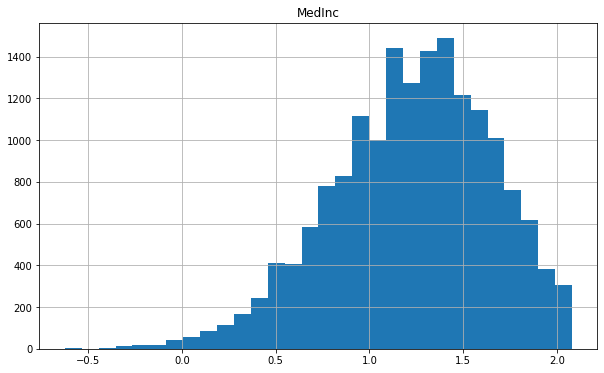

In [141]:
np.log(cleaned_df[['MedInc']]).hist(figsize=(10, 6), bins=30)

array([[<AxesSubplot:title={'center':'MedInc'}>]], dtype=object)

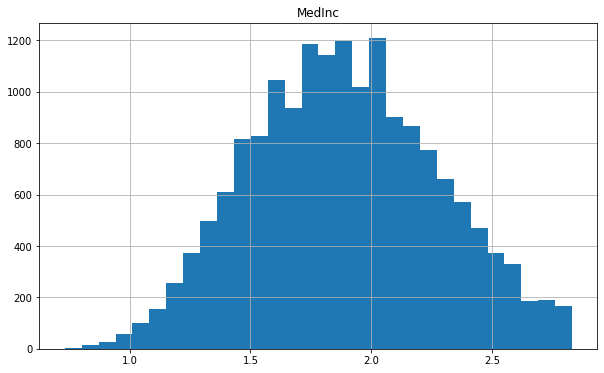

In [142]:
(cleaned_df[['MedInc']] ** 0.5).hist(figsize=(10, 6), bins=30)

Посмотрим на преобразования над HouseAge. Извлечение логарифма кажется лучшим решением для этого признака.

array([[<AxesSubplot:title={'center':'HouseAge'}>]], dtype=object)

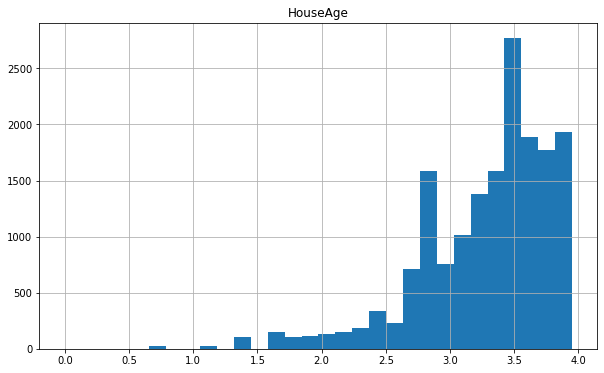

In [143]:
np.log(cleaned_df[['HouseAge']]).hist(figsize=(10, 6), bins=30)

array([[<AxesSubplot:title={'center':'HouseAge'}>]], dtype=object)

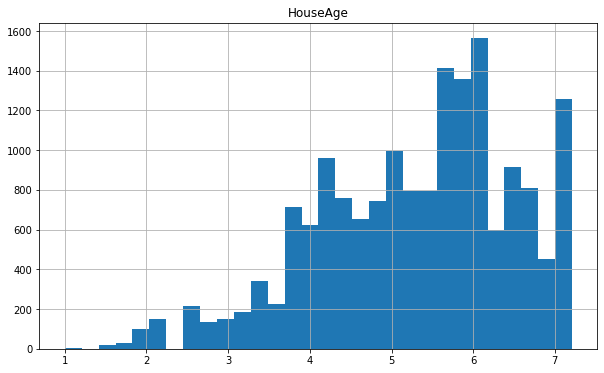

In [144]:
(cleaned_df[['HouseAge']]**0.5).hist(figsize=(10, 6), bins=30)

Похоже долготу и широту лучше не менять

array([[<AxesSubplot:title={'center':'Longitude'}>]], dtype=object)

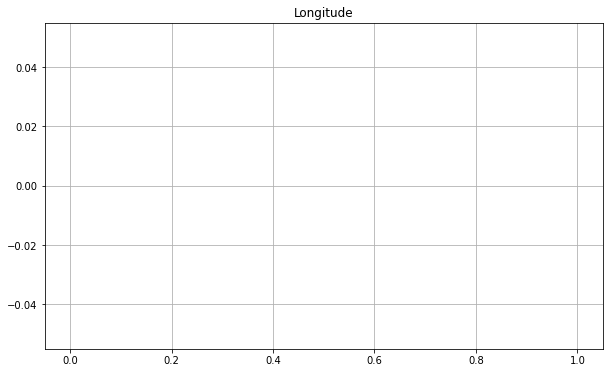

In [145]:
np.log(cleaned_df[['Longitude',]]).hist(figsize=(10, 6), bins=30)

array([[<AxesSubplot:title={'center':'Longitude'}>]], dtype=object)

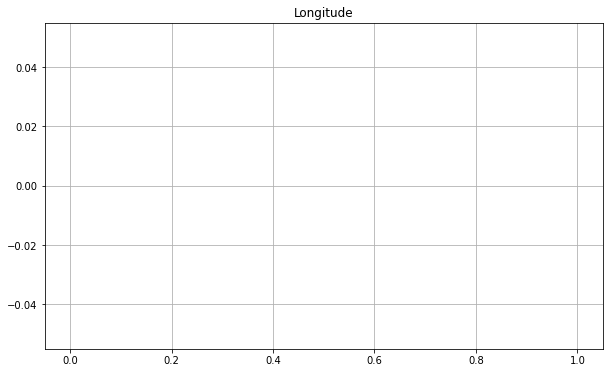

In [146]:
(cleaned_df[['Longitude']]**0.5).hist(figsize=(10, 6), bins=30)

Преобразуем теперь наши признаки по проведенному исследованию и применим подходящие мат. операции

In [147]:
transformed_df = cleaned_df.copy()

In [148]:
cleaned_df

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [149]:
transformed_df[['MedHouseVal']] = (cleaned_df[['MedHouseVal']] ** 0.5)
transformed_df[['MedInc']] = (cleaned_df[['MedInc']] ** 0.5)
transformed_df[['HouseAge']] = np.log(cleaned_df[['HouseAge']])

In [150]:
transformed_df

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
2,2.693956,3.951244,1.073446,496.0,2.802260,37.85,-122.24,1.876433
3,2.375521,3.951244,1.073059,558.0,2.547945,37.85,-122.25,1.847431
4,1.961173,3.951244,1.081081,565.0,2.181467,37.85,-122.25,1.849865
5,2.009179,3.951244,1.103627,413.0,2.139896,37.85,-122.25,1.642255
6,1.912877,3.951244,0.951362,1094.0,2.128405,37.84,-122.25,1.729740
...,...,...,...,...,...,...,...,...
20634,1.926785,3.332205,1.148256,1041.0,3.026163,39.27,-121.56,1.080740
20635,1.249120,3.218876,1.133333,845.0,2.560606,39.48,-121.09,0.883742
20637,1.303840,2.833213,1.120092,1007.0,2.325635,39.43,-121.22,0.960729
20638,1.366455,2.890372,1.171920,741.0,2.123209,39.43,-121.32,0.920326


Теперь наши признаки выглядят куда лучше чем изначально

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveBedrms'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>, <AxesSubplot:>]],
      dtype=object)

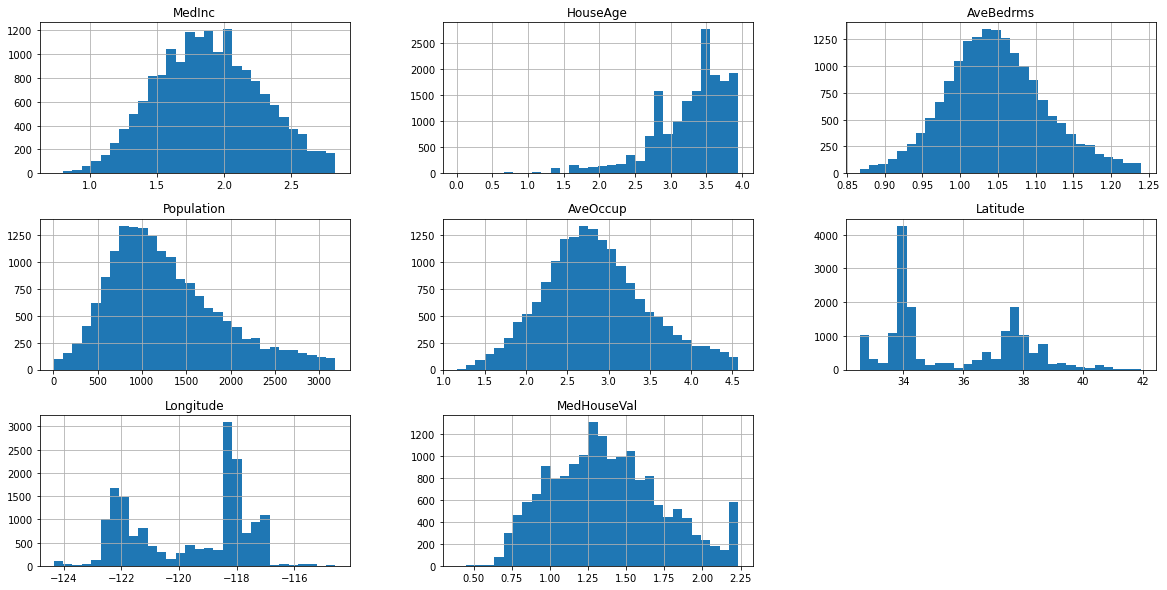

In [151]:
transformed_df.hist(figsize=(20, 10), bins=30)

<AxesSubplot:>

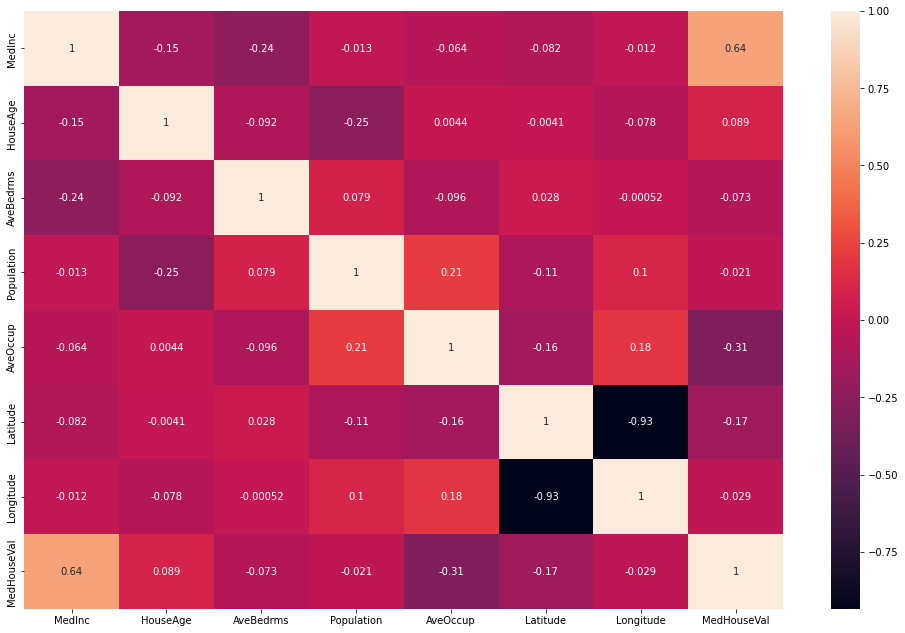

In [152]:
plt.subplots(figsize=(17,11))  
sns.heatmap(transformed_df.corr(), annot=True, fmt='.2g')

Проведем обучение

In [153]:
train(transformed_df, model_name='После математических преобразований')

Test RMSE:  0.2126983864989393
Train RMSE:  0.21462118322352802
Test R2:  0.6681572231121566
Train R2:  0.6589254740951068
Test Score:  0.6681572231121566
Train Score:  0.6589254740951068


Посмотрим на окончательную статистику после всех наших обучений

In [154]:
stat = pd.DataFrame(statistic[1:], columns = statistic[0])
stat

,model,RMSE_Test,RMSE_Train,R2_Test,R2_Train
0,Необработаная модель,0.732764,0.722491,0.601385,0.606821
1,После удаления AveBedrms,0.742417,0.731181,0.590814,0.597305
2,После удаления AveRooms,0.735726,0.728579,0.598156,0.600166
3,После удаления Longitude,0.812755,0.796615,0.509607,0.522005
4,После удаления Latitude,0.817778,0.803018,0.503527,0.514291
5,После удаления выбросов,0.646134,0.653238,0.638807,0.629647
6,После математических преобразований,0.212698,0.214621,0.668157,0.658925


#### Выводы

В ходе работы были удалены признаки которые коррелировали между собой, были удалены выбросы и проведены мат. преобразования (логарифмирование и извлечение корня), с помощью чего мы добились улучшения качества модели на ~6-7% (по R2_Test).

Первоночально после удаления коррелируемого признака процент успешных предсказаний уменьшился, но после чистки выбросов и мат. преобразований процент постепенно рос.

По итогу преобразования помогли в улучшении качества модели. Возможно некоторые моменты были избыточны или не расмотрены, но так или иначе модель улучшила свои показатели.


#### Вопросы

1) Обратная корреляция между не целевыми признаками полезна? В данном случае между Longitude и Latitude.

2) Если между нецелевой переменной и целевой корреляция по модулю меньше 0.1, то есть смысл использовать такие признаки? На практике похоже, что да, если например убрать из датафрейма Longitude и Latitude, то метрики сильно упадут, но почему так? Если они не коррелируют с целевой переменной? Или тут еще важно смотреть как они коррелируют с другими нецелевыми переменными? 